#About the Dataset
###The Credit Card Dataset for clustering is a popular dataset used to perform clustering analysis. One widely known version of this dataset is available on Kaggle. It contains anonymized data about credit card transactions and various attributes that can be used to understand customer behavior.

###Source: You can find the dataset on Kaggle at the following link:

###Kaggle: Credit Card Dataset for Clustering

#Introduction:

The Credit Card Dataset for Clustering consists of data about customers' credit card transactions and behavior. This dataset can be used to perform clustering analysis to segment customers based on their spending patterns and other attributes. The goal of clustering in this context is to group customers into different segments that exhibit similar behavior, which can then be used for targeted marketing, risk management, and improving customer service.

The dataset typically contains the following features:



*   Balance: The balance amount on the credit card.
*   Balance Frequency: Frequency of balance updates.
* Purchases: Total amount of purchases made.
* One-off Purchases: Amount of one-off purchases.
* Installments Purchases: Amount of installment purchases.
* Cash Advance: Amount of cash advances taken.
* Purchases Frequency: Frequency of purchases.
* One-off Purchases Frequency: Frequency of one-off purchases.
* Purchases Installments Frequency: Frequency of installment purchases.
* Cash Advance Frequency: Frequency of cash advances.
* Cash Advance Trx: Number of cash advance transactions.
* Purchases Trx: Number of purchase transactions.
* Credit Limit: Credit limit assigned to the customer.
* Payments: Total amount of payments made.
* Minimum Payments: Minimum payments made.
* PRC Full Payment: Percent of full paymen
* Tenure: Tenure of credit card service.



#Importing Necessary Libraries

We are required to importing the libraries so as to performing EDA. These include NumPy, Pandas, Matplotlib, and Seaborn.

In [1]:
import pandas as pd # Pandas is a powerful library for data manipulation and analysis.
import numpy as np # NumPy is a powerful tool for numerical computations in Python.
from sklearn import cluster

#Loading the Dataset
The line df = pd.read_csv starts the process of reading a CSV file into a pandas DataFrame.

This allows for easy data manipulation and analysis using pandas functionalities.

In [2]:
cc = pd.read_csv("CC GENERAL.csv")

In [3]:
cc  # Displays the first 5 rows and the last 5 rows of the Dataset

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [4]:
cc.columns # Displays the names of the columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [5]:
cc.shape # Displays the total count of the Rows and Columns of the dataset respectively.

(8950, 18)

In [6]:
cc.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

The df.info() method in pandas provides a concise summary of a DataFrame.
Purpose:

* Overview: Gives an overview of the DataFrame’s structure and contents.

* Data Types: Displays the data types of each column.

* Non-null Values: Shows the number of non-null (non-missing) values in each column.

* Memory Usage: Indicates the memory usage of the DataFrame.

In [7]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Checking if there is any Null value in the Data

We will now check for missing values in our dataset. In case there are any missing entries, we will impute them with appropriate values (mode in case of categorical feature, and median or mean in case of numerical feature). We will use the isnull() function for this purpose.

In [8]:
cc.isnull().sum() # Displays the total count of the null valuesin the particular columns.

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There are very few null values in credit limit and minimum payments column. Lets impute these values later.

In [10]:
cc = cc.drop(['MINIMUM_PAYMENTS', 'CREDIT_LIMIT'], axis=1) #Dropping the unwanted cloumns

In [11]:
cc.isnull().sum() #Checking the dataframe for missing or null values

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
PAYMENTS                            0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
cc.dtypes


CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
PAYMENTS                            float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [13]:
cc= cc.drop(['CUST_ID'], axis=1) #Dropping the column which is not needed

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #Initialize the scaler: Create an instance of StandardScaler.
scaled_cc = scaler.fit_transform(cc) # Fit the scaler to the selected columns and transform them


In [15]:
cc = pd.get_dummies(cc, drop_first=True) #Used for encoding categorical variables in the dataset


In [16]:
cc = cc.dropna() #Used for dropping nan values


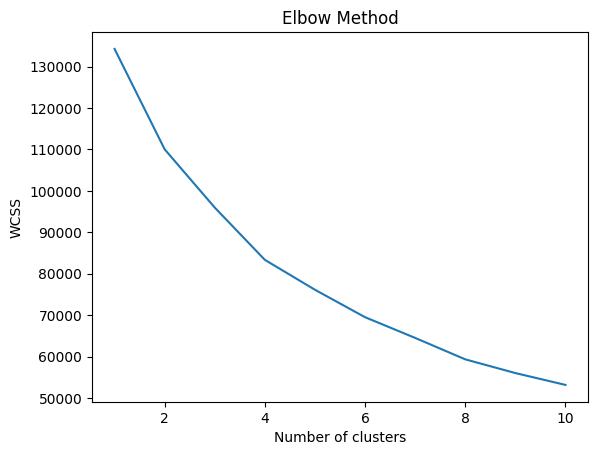

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = [] # This list will store the WCSS values for different numbers of clusters.
for i in range(1, 11): #This loop will calculate the WCSS for each number of clusters from 1 to 10.
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42) # Initialize k-means with i clusters:
    kmeans.fit(scaled_cc) #This trains the k-means algorithm on the scaled dataset.
    wcss.append(kmeans.inertia_) #The inertia_ attribute of the fitted k-means object gives the WCSS, which is then appended to the list.

#Plot the WCSS values:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [18]:
from sklearn.metrics import silhouette_score

for n_clusters in range(2, 11): #This loop will calculate the Silhouette Score for each number of clusters from 2 to 10.
    kmeans = KMeans(n_clusters=n_clusters, random_state=42) #Initialize k-means with n_clusters clusters:
    cluster_labels = kmeans.fit_predict(scaled_cc) #Fit the k-means algorithm to the scaled data and predict cluster labels
    silhouette_avg = silhouette_score(scaled_cc, cluster_labels) #silhouette_score function computes the average Silhouette Score for all samples. This score provides an indication of how well the samples have been clustered.
    print(f'For n_clusters = {n_clusters}, the average silhouette_score is {silhouette_avg}') #Print the Silhouette Score.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the average silhouette_score is 0.2286998676660783


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the average silhouette_score is 0.20786643775520486


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the average silhouette_score is 0.21756095733682843


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the average silhouette_score is 0.21397583362154116


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the average silhouette_score is 0.22991104694353676


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the average silhouette_score is 0.23634496330639204


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the average silhouette_score is 0.2531568042168162


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the average silhouette_score is 0.24185401478716712


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, the average silhouette_score is 0.240535847861591


In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_cc)
cc['Cluster'] = cluster_labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
print(kmeans.cluster_centers_)


[[-0.34582355  0.08826308  0.04136963 -0.04019566  0.17158738 -0.36741584
   0.82080882  0.21727283  0.7147165  -0.4771153  -0.36376535  0.18418578
  -0.17469857  0.39836322  0.06037748]
 [ 0.96585707  0.46447561  2.67220166  2.29952662  2.09368223  0.21454584
   1.14450436  1.7309074   1.09083665 -0.06250859  0.10979685  2.71044204
   1.86723163  0.33621283  0.31689036]
 [ 0.18933173 -0.13214499 -0.35131331 -0.23586357 -0.39727717  0.29683957
  -0.85458095 -0.39456237 -0.75523675  0.42568278  0.30598849 -0.48103648
  -0.06697155 -0.38890517 -0.09029642]]


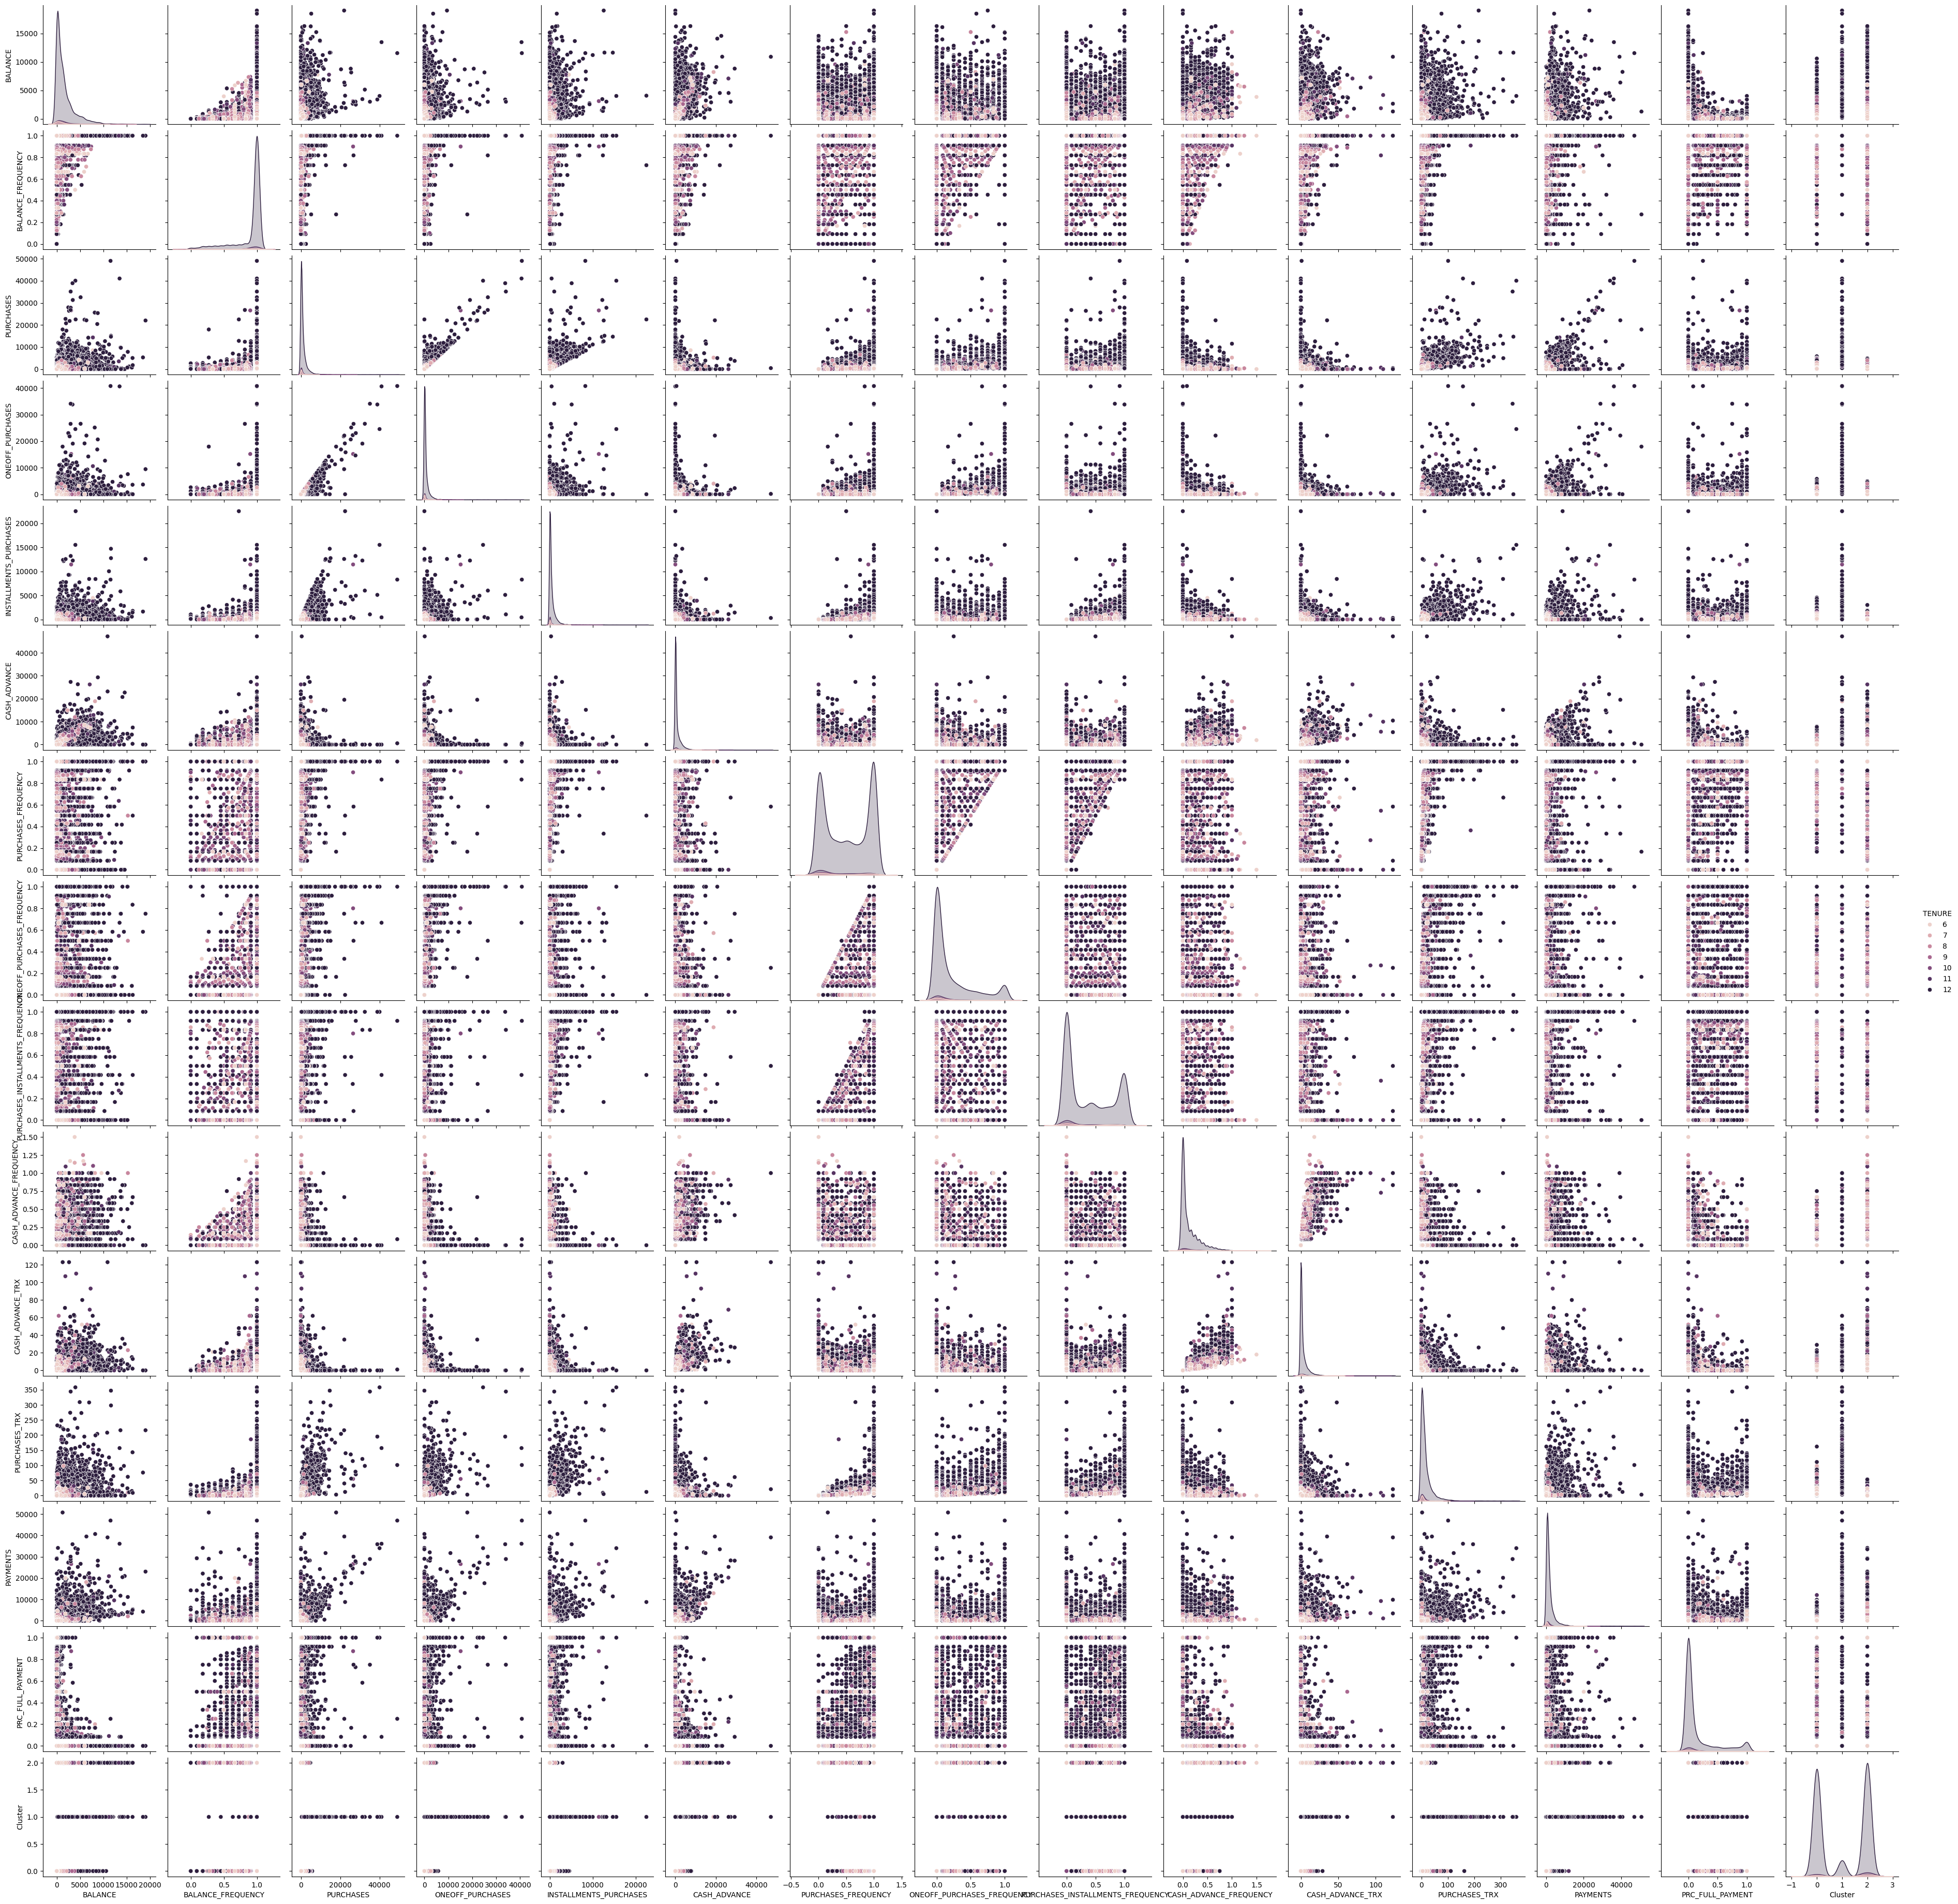

In [21]:
import seaborn as sns

sns.pairplot(cc, hue='TENURE')
plt.show()
